# Generating maze with rewards and agent

Defining maze environment with objects, such as obstacles, agent and reward.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

from mazelab import VonNeumannMotion
from mazelab import MooreMotion
import gym

In [16]:
from mazelab import BaseMaze
from mazelab import Object
from mazelab import DeepMindColor as color


class Maze(BaseMaze):
    @property
    def size(self):
        return maze.shape
    
    def make_objects(self):
        free = Object('free', 0, color.free, False, np.stack(np.where(maze == 0), axis=1))
        obstacle = Object('obstacle', 1, color.obstacle, True, np.stack(np.where(maze == 1), axis=1))
        agent = Object('agent', 2, color.agent, False, [])
        goal = Object('goal', 3, color.goal, False, [])
        return free, obstacle, agent, goal

In [17]:
from mazelab import BaseEnv
from mazelab import VonNeumannMotion
import gym
from gym.spaces import Box
from gym.spaces import Discrete


class Env(BaseEnv):
    def __init__(self):
        super().__init__()
        
        self.maze = Maze()
        self.motions = VonNeumannMotion()
        
        self.observation_space = Box(low=0, high=len(self.maze.objects), shape=self.maze.size, dtype=np.uint8)
        self.action_space = Discrete(len(self.motions))
        
    def step(self, action):
        motion = self.motions[action]
        current_position = self.maze.objects.agent.positions[0]
        new_position = [current_position[0] + motion[0], current_position[1] + motion[1]]
        valid = self._is_valid(new_position)
        if valid:
            self.maze.objects.agent.positions = [new_position]
        
        if self._is_goal(new_position):
            reward = +1
            done = True
        elif not valid:
            reward = -1
            done = False
        else:
            reward = -0.01
            done = False
        return self.maze.to_value(), reward, done, {}
        
    def reset(self):
        self.maze.objects.agent.positions = start_idx
        self.maze.objects.goal.positions = goal_idx
        return self.maze.to_value()
    
    def _is_valid(self, position):
        nonnegative = position[0] >= 0 and position[1] >= 0
        within_edge = position[0] < self.maze.size[0] and position[1] < self.maze.size[1]
        passable = not self.maze.to_impassable()[position[0]][position[1]]
        return nonnegative and within_edge and passable
    
    def _is_goal(self, position):
        out = False
        for pos in self.maze.objects.goal.positions:
            if position[0] == pos[0] and position[1] == pos[1]:
                out = True
                break
        return out
    
    def get_image(self):
        return self.maze.to_rgb()

## Environment v3

In [16]:
f = open('C:/Users/48786/Documents/GitHub/graph_navig/mazes/src/3.txt', 'r')
maze_txt = f.read()
print(maze_txt)
#\1 for walls and \0 for a possible way

1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,1,0,1,1,0,0,0,1,0,1,1,0,0
0,1,0,0,1,1,0,0,1,0,0,1,1,0
1,0,0,1,1,0,1,1,0,0,1,1,0,1
0,1,0,1,1,0,0,0,1,0,1,1,0,0
0,0,0,1,1,0,1,0,0,0,1,1,0,1
0,0,0,0,1,0,1,0,0,0,0,1,0,1
1,1,1,1,1,1,0,0,1,1,1,1,1,1
0,1,0,1,1,0,0,0,1,0,1,1,0,0
0,1,0,0,1,1,0,0,1,0,0,1,1,0
1,0,0,1,1,0,1,1,0,0,1,1,0,1
0,1,0,1,1,0,0,0,1,0,1,1,0,0
0,0,0,1,1,0,1,0,0,0,1,1,0,1
0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [17]:
maze_lst = []
for i in maze_txt:
    if i == "1":
        maze_lst.append(0)
    elif i == "0":
        maze_lst.append(1)
    else:
        continue
print(len(maze_lst))

maze = np.array(maze_lst)
maze = maze.reshape(14, 14)
print(maze)

196
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 1 1 0 1 0 0 1 1]
 [1 0 1 1 0 0 1 1 0 1 1 0 0 1]
 [0 1 1 0 0 1 0 0 1 1 0 0 1 0]
 [1 0 1 0 0 1 1 1 0 1 0 0 1 1]
 [1 1 1 0 0 1 0 1 1 1 0 0 1 0]
 [1 1 1 1 0 1 0 1 1 1 1 0 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 1 0 0 1 1 1 0 1 0 0 1 1]
 [1 0 1 1 0 0 1 1 0 1 1 0 0 1]
 [0 1 1 0 0 1 0 0 1 1 0 0 1 0]
 [1 0 1 0 0 1 1 1 0 1 0 0 1 1]
 [1 1 1 0 0 1 0 1 1 1 0 0 1 0]
 [1 1 1 1 0 1 0 1 1 1 1 0 1 0]]


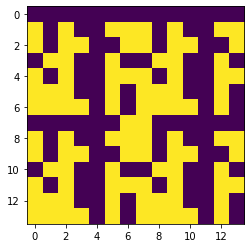

In [18]:
start_idx = [[0,13]]
goal_idx = [[9, 12]]

plt.imshow(maze)

env_id_v3 = 'MazeRoom-v3'

In [20]:
from gym.envs.registration import register


gym.envs.register(
     id=env_id_v3,
     entry_point=Env
)

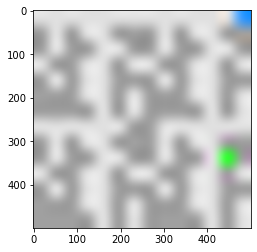

In [21]:
env_v3 = gym.make(env_id_v3)
env_v3.reset()
img = env_v3.render('rgb_array')
plt.imshow(img)

## Environment v2

In [4]:
p = open('C:/Users/48786/Documents/GitHub/graph_navig/mazes/src/2.txt', 'r')
maze_txt = p.read()
print(maze_txt)

1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1
1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
maze_lst = []
for i in maze_txt:
    if i == "1":
        maze_lst.append(1)
    elif i == "0":
        maze_lst.append(0)
    else:
        continue
print(len(maze_lst))

maze = np.array(maze_lst)
maze = maze.reshape(21, 11)
print(maze)

231
[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 1 0 0 0 1]
 [0 0 0 1 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0 0]
 [1 0 1 1 1 1 0 1 1 0 0]
 [0 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 1]
 [1 1 1 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 1 1 1]
 [1 0 0 0 1 1 1 1 0 1 1]
 [1 1 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


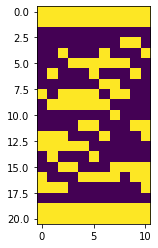

In [6]:
start_idx = [[2,10]]
goal_idx = [[14, 2]]

plt.imshow(maze)

env_id = 'MazeRoom-v2'
#env_id_v2 = 'MazeRoom-v2'

In [7]:
from gym.envs.registration import register


gym.envs.register(
     id=env_id,
     entry_point=Env
)

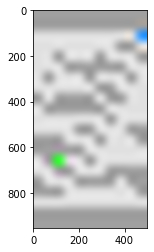

In [8]:
env = gym.make(env_id)
env.reset()
img = env.render('rgb_array')
plt.imshow(img)

## Environment v1

In [18]:
q = open('C:/Users/48786/Documents/GitHub/graph_navig/mazes/src/1.txt', 'r')
maze_txt = q.read()
print(maze_txt)

1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1
1,0,1,0,1,1,1,1,1
1,0,0,0,1,0,0,0,1
1,0,1,1,1,1,1,0,1
1,0,0,0,0,0,0,0,1
1,0,1,1,1,1,1,0,1
1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1


In [19]:
maze_lst = []
for i in maze_txt:
    if i == "1":
        maze_lst.append(1)
    elif i == "0":
        maze_lst.append(0)
    else:
        continue
print(len(maze_lst))

maze = np.array(maze_lst)
maze = maze.reshape(9, 9)
print(maze)

81
[[1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1]]


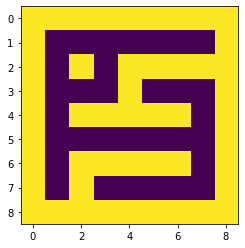

In [20]:
start_idx = [[1,7]]
goal_idx = [[7, 3]]

plt.imshow(maze)

env_id = 'MazeRoom-v1'

In [21]:
gym.envs.register(
     id=env_id,
     entry_point=Env
)

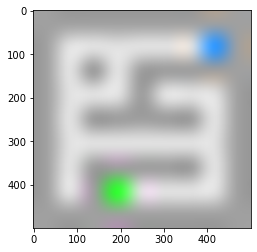

In [23]:
env = gym.make(env_id)
env.reset()
img = env.render('rgb_array')
plt.imshow(img)

# Finding the shortest way

[Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) is an algorithm for finding the shortest path between nodes in a graph, producing shortest-path tree.

In [24]:
from mazelab.solvers import dijkstra_solver

impassable_array = env.unwrapped.maze.to_impassable()
motions = env.unwrapped.motions
start = env.unwrapped.maze.objects.agent.positions[0]
goal = env.unwrapped.maze.objects.goal.positions[0]
actions = dijkstra_solver(impassable_array, motions, start, goal)
print(actions)
env = gym.wrappers.Monitor(env, './', force=True)
rewards = 0.0
env.reset()
for action in actions:
    _, reward, _, _ = env.step(action)
    rewards += reward
env.close()
print(rewards)

[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2]
0.7899999999999999


In [10]:
pip install imageio-ffmpeg

Note: you may need to restart the kernel to use updated packages.


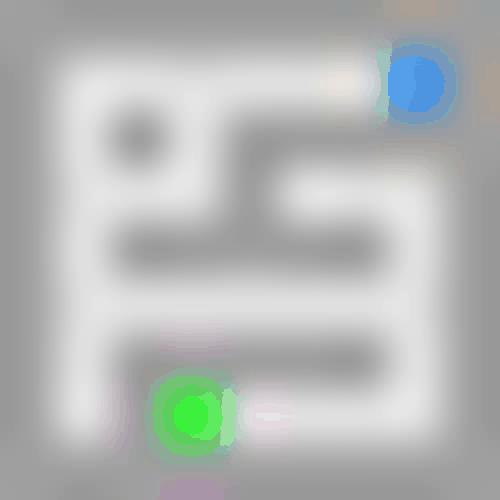

In [26]:
import imageio
from IPython.display import Image
from pathlib import Path
f = list(Path('./').glob('*.mp4'))[0]
reader = imageio.get_reader(f)
f = f'./{env_id}.gif'
with imageio.get_writer(f, fps=3) as writer:
    [writer.append_data(img) for img in reader]
Image(f)

# Maze exploration

In [13]:
pip install gym_mazeexplorer

  Using cached cocos2d-0.6.9.tar.gz (4.7 MB)
  Created wheel for gym-mazeexplorer: filename=gym_mazeexplorer-0.0.2-py3-none-any.whl size=4871 sha256=e644cfb15a6638fa4cbc7f8e35b844aa24e84cfae15659d667a9fd36ff058dbe
  Stored in directory: c:\users\48786\appdata\local\pip\cache\wheels\5c\7a\23\4de931ed99f291a40821efd50f4dbfef74bb3e4d8441db97cc
  Created wheel for mazeexp: filename=mazeexp-0.0.2-py3-none-any.whl size=18870 sha256=319d324f8964fa97be5aeb889d2f890298e94d137acf86cac74f5b9745ccf205
  Stored in directory: c:\users\48786\appdata\local\pip\cache\wheels\15\a8\22\80b7be33074b046dc4d59c6df65c59647b8fa611472f7d78b9
  Created wheel for cocos2d: filename=cocos2d-0.6.9-py3-none-any.whl size=305817 sha256=be124c1825b25ef5d110c2b637f3cc0caf7ac890833defdac72bdafb115d9f93
  Stored in directory: c:\users\48786\appdata\local\pip\cache\wheels\2d\8a\d5\ce0697ee0fb73a9f62b4c1c45a8cfced607e80d3a6bc14b93e
Successfully built gym-mazeexplorer mazeexp cocos2d
Note: you may need to restart the kernel t

In [14]:
import gym_mazeexplorer
import unittest


env.reset()

for _ in range(50):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)


TypeError: __init__() got an unexpected keyword argument 'timestep_limit'

In [1]:
BOARD_ROWS = 11
BOARD_COLS = 21
WIN_STATE = (9,7)
START = (1, 18)
DETERMINISTIC = False

class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE):
            self.isEnd = True

    def _chooseActionProb(self, action):
        if action == "up":
            return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "down":
            return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
        if action == "left":
            return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
        if action == "right":
            return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position on board
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            self.determine = False
        else:
            # non-deterministic
            action = self._chooseActionProb(action)
            self.determine = True
            nxtState = self.nxtPosition(action)

        # if next state is legal
        if (nxtState[0] >= 0) and (nxtState[0] <= 2):
            if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                if nxtState != (1, 1):
                    return nxtState
        return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')


class Agent:

    def __init__(self):
        self.states = []  # record position and action taken at the position
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.isEnd = self.State.isEnd
        self.lr = 0.2
        self.exp_rate = 0.3
        self.decay_gamma = 0.9

        # initial Q values
        self.Q_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0  # Q value is a dict of dict

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                current_position = self.State.state
                nxt_reward = self.Q_values[current_position][a]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
            # print("current pos: {}, greedy aciton: {}".format(self.State.state, action))
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        # update State
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()
        self.isEnd = self.State.isEnd

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                for a in self.actions:
                    self.Q_values[self.State.state][a] = reward
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    current_q_value = self.Q_values[s[0]][s[1]]
                    reward = current_q_value + self.lr * (self.decay_gamma * reward - current_q_value)
                    self.Q_values[s[0]][s[1]] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append([(self.State.state), action])
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")
                self.isEnd = self.State.isEnd


if __name__ == "__main__":
    ag = Agent()
    print("initial Q-values ... \n")
    print(ag.Q_values)

    ag.play(50)
    print("latest Q-values ... \n")
    print(ag.Q_values)


NameError: name 'np' is not defined